In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Pandas Library

In [2]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df = df.drop(['car name', 'horsepower'], axis=1)
df

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1
394,44.0,4,97.0,2130,24.6,82,2
395,32.0,4,135.0,2295,11.6,82,1
396,28.0,4,120.0,2625,18.6,82,1


In [6]:
model_year_count = df['model year'].drop_duplicates().count()
origin_count = df['origin'].drop_duplicates().count()
model_year_count, origin_count

(13, 3)

In [8]:
grpby_model_year = df.groupby('model year').count()
grpby_model_year

,mpg,cylinders,displacement,weight,acceleration,origin
model year,,,,,,
70,29,29,29,29,29,29
71,28,28,28,28,28,28
72,28,28,28,28,28,28
73,40,40,40,40,40,40
74,27,27,27,27,27,27
75,30,30,30,30,30,30
76,34,34,34,34,34,34
77,28,28,28,28,28,28
78,36,36,36,36,36,36


#### Matplotlib Library

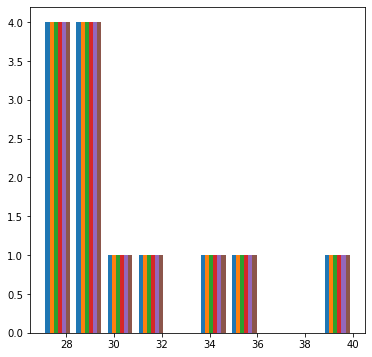

In [9]:
plt.figure(figsize=(6,6))
plt.hist(grpby_model_year)
plt.show()

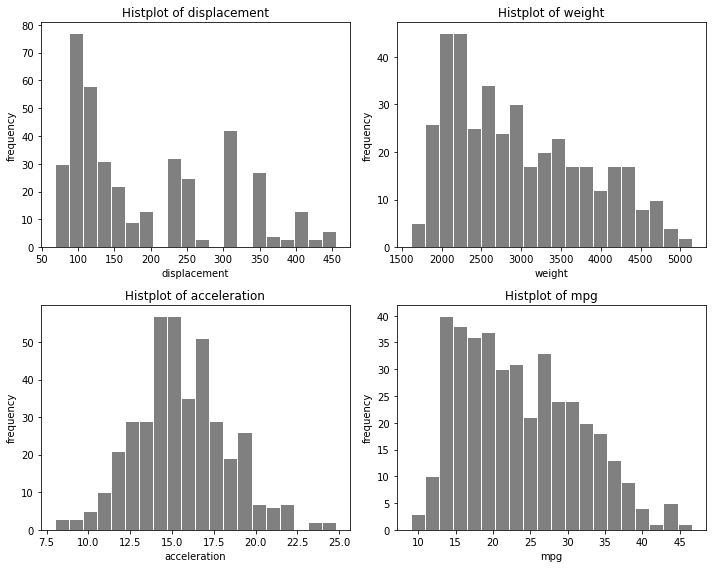

In [49]:
def plot_hist(data, features):
    len_features = len(features)
    plt.figure(figsize=(10,8))
    for i, feature in enumerate(features):
        plt.subplot(2, 2, i+1)
        plt.hist(data = df, x = feature, bins = 20, color = 'grey', edgecolor = 'white')
        plt.title(f"Histplot of {feature}")
        plt.xlabel(feature)
        plt.ylabel("frequency")
    plt.tight_layout()
    plt.show()

features = ['displacement', 'weight', 'acceleration', 'mpg']
plot_hist(df, features)

#### Seaborn Library

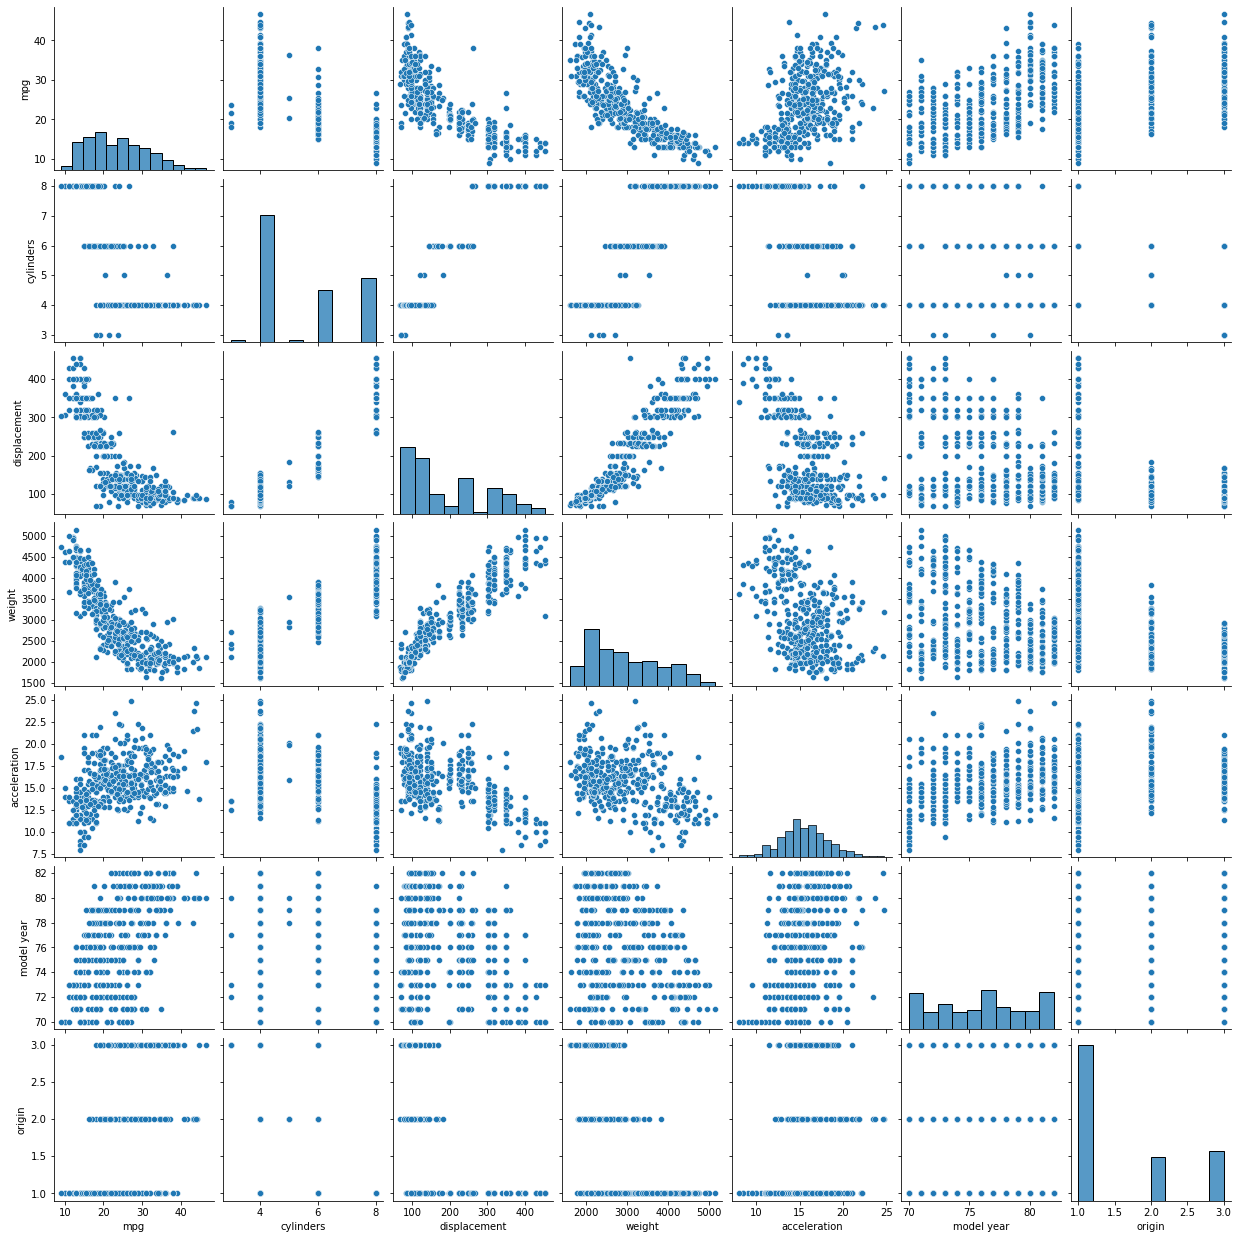

In [52]:
sb.pairplot(df)
plt.show()

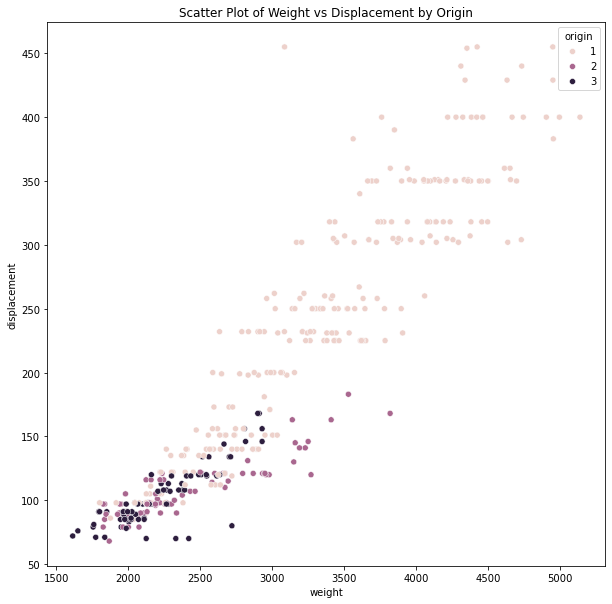

In [51]:
plt.figure(figsize=(10,10))
sb.scatterplot(x='weight', y='displacement', hue='origin', data=df)
plt.title('Scatter Plot of Weight vs Displacement by Origin')
plt.xlabel('weight')
plt.ylabel('displacement')
plt.show()

In [11]:
corr = df.corr()
corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


[]

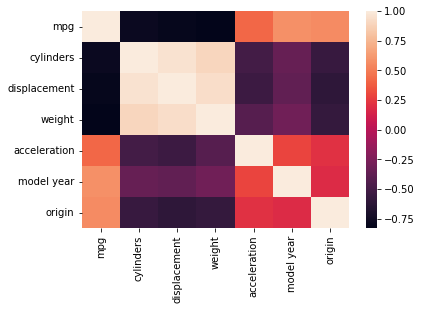

In [12]:
sb.heatmap(corr)
plt.plot()